<a href="https://colab.research.google.com/github/Adriana0015/iayaa-Equipo-15/blob/main/MNA_IAyAA_semana_6_Actividad_Rev_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**
* Adriana Fernanda Jimenez Avalos - A01087695
* Vladimir Salazar Altamirano - A01793118
* Pablo Alejandro Colunga Vázquez - A01793671  
* Julián Valera Juárez - A01793875
* Luis Daniel Rivera Salinas - A01374997


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [50]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas.core.arrays import categorical # agregar class pandas.Categorical(values, categories=None, ordered=None, dtype=None, fastpath=False, copy=True)
from sklearn.pipeline import Pipeline #agregar para ejercicio 3a
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression         

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import requests, zipfile, io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import tree


#**Ejercicio-1.** 
Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip'
file_name = 'SouthGermanCredit.asc'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
df = pd.read_csv(file_name, sep=' ')
df=df.rename(columns={'laufkont':'status','laufzeit':'duration','moral':'credit_history','verw':'purpose','hoehe':'amount','sparkont':'savings','beszeit':'employment_duration','rate':'installment_rate','famges':'personal_status_sex','buerge':'other_debtors','wohnzeit':'present_residence','verm':'property','alter':'age','weitkred':'other_installment_plans','wohn':'housing','bishkred':'number_credits','beruf':'job','pers':'people_liable','telef':'telephone','gastarb':'foreign_worker','kredit':'credit_risk'})
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


#**Ejercicio-2.** 

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida.

In [6]:
# definiendo variables de entrada y salida
X = df.iloc[:,0:20]  
Y = df.iloc[:,-1]   


In [7]:
#Consideraremos un  15%  de datos en el conjunto de prueba y dejaremos el resto,  85% , para utilizar en validación-cruzada.
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)  
Xtv.head()

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada para entrenamiento y validación
(150, 20) : dimensión de datos de entrada para prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


In [8]:
Xtv.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.584706,20.834118,2.536471,2.730588,3312.940000,2.104706,3.365882,2.955294,2.677647,1.150588,2.850588,2.342353,35.497647,2.680000,1.920000,1.411765,2.917647,1.850588,1.395294,1.963529
std,1.265842,12.084197,1.080597,2.673278,2856.926831,1.575610,1.213980,1.122792,0.713058,0.488652,1.118442,1.054116,11.307278,0.702478,0.530084,0.582309,0.642283,0.356704,0.489202,0.187568
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1365.750000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2321.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,4012.500000,3.000000,4.000000,4.000000,3.000000,1.000000,4.000000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,15945.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones: 

a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso). 





Justificacion

Para las variables de entrada se dividieron en categoricas, binarias y cuantitativas. Para la eleccion del metodo de imputacion se considera el tipo de variable. La categorica y binaria se aplica most frequent debido a que se require tener valores para el analisis del modelo. La cuantitativa se aplica mean ya que tiene datos numericos, ya que requerimos de datos numericos para ejecutar los modelos.


In [9]:
#Definimos variables categóricas
df_cat= ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing'] #columnas categoricas
df_ord= ['employment_duration','installment_rate','present_residence','property','number_credits','job'] #columna ordinales o discretas
df_num= ['duration','amount','age'] #columnas numericas
df_bin= ['people_liable','foreign_worker', 'telephone'] #columnas binarias

#revisar si hay datos NA o nulos para hacer imputacion
Xtv.isna().sum()


status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

In [10]:
Xtv.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

In [11]:
#realizar la imputacion de las variables de entrada

#Categoricas

imputacion_categorica = SimpleImputer( strategy = "most_frequent")

imputacion_categorica = imputacion_categorica.fit_transform( Xtv[ df_cat ], ytv )

#Binarias

imputacion_binaria= SimpleImputer( strategy = "most_frequent")

imputacion_binaria= imputacion_binaria.fit_transform( Xtv[ df_bin ], ytv )

#Cuantitativas

imputacion_cuantitativa= SimpleImputer( strategy = "mean")

imputacion_cuantitativa= imputacion_cuantitativa.fit_transform( Xtv[ df_num ], ytv )

b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable. 


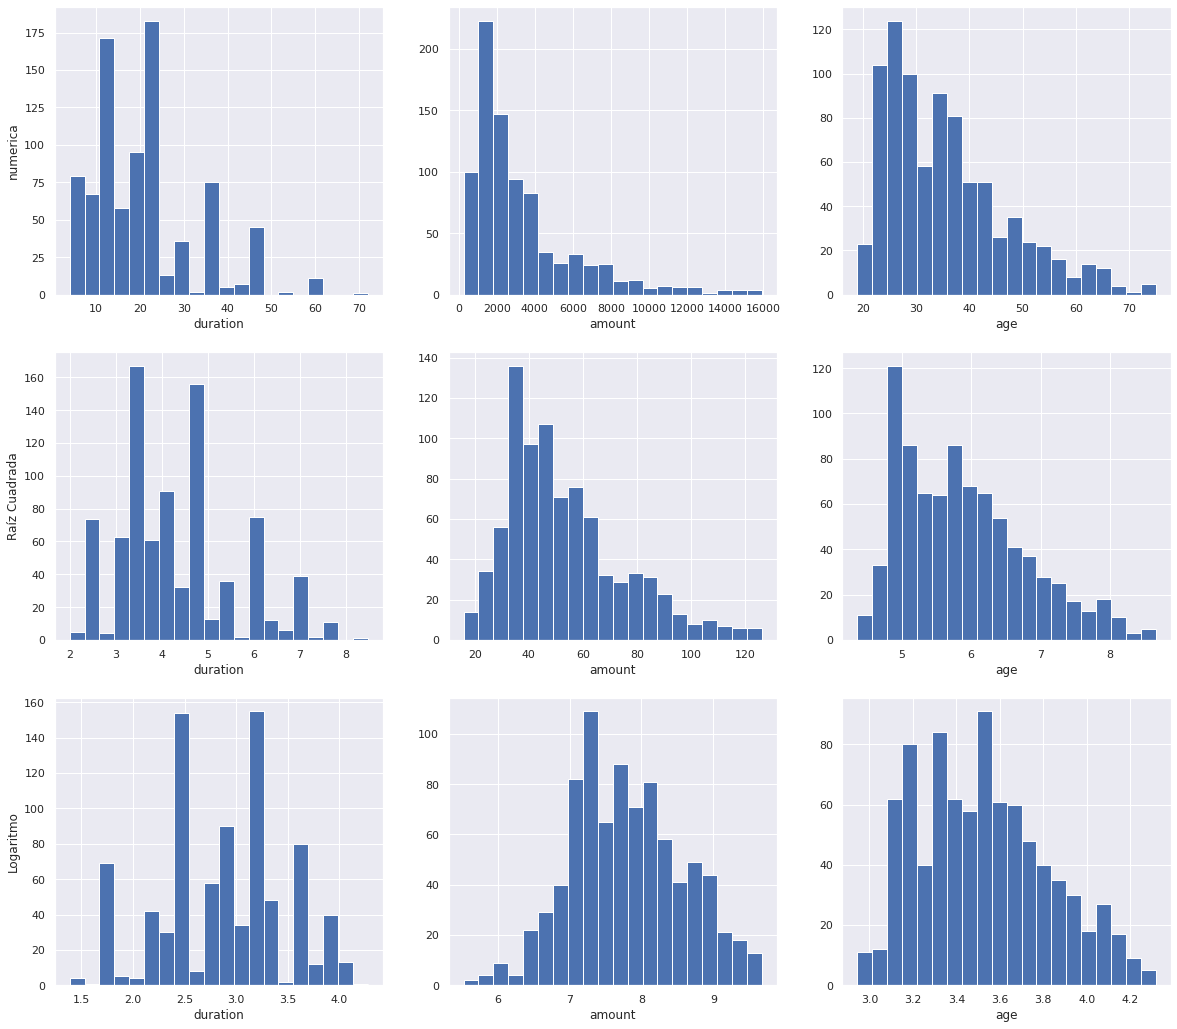

In [12]:
#Analisis de las variables numericas
#Para conocer que metodo elegir
sns.set(rc={'figure.figsize':(20,18)})

k=0
fig, axes = plt.subplots(3, 3)   
for k in range(0,3):  
  plt.subplot(3,3,k+1) 

  Transf0 = Xtv[df_num].iloc[:,k].to_numpy().reshape(-1, 1) 
  plt.hist(Transf0, bins=20) 
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('numerica')
  
  plt.subplot(3,3,k+4)    
  Transf1 = np.sqrt(Transf0)       
  plt.hist(Transf1, bins=20)       
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(3,3,k+7)    
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2, bins=20)      
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('Logaritmo')

In [13]:
#Transformacion

#Variables numericas
pl_num = Pipeline(steps = [('scalar', MinMaxScaler(feature_range=(1,2))),('log', FunctionTransformer(np.log))])
#Variables Categoricas
pl_cat = Pipeline(steps = [('OneHotE', OneHotEncoder(handle_unknown="ignore"))])

pl_bin = Pipeline(steps = [('OneHotE', OneHotEncoder(handle_unknown="ignore"))])

c. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot enco

Justificacion

Una variable binaria requiere que se le aplique la transformación one-hot encoder para poder facilitar su manipulacion de datos para el analisis del modelo futuro. El tener una variable binaria no da suficiente datos que se puedan manejar en el modelo, se necesita romper la variable binaria en dos diferentes columnas para poder tomar en cuenta las diferentes variables de ella.

In [14]:
transformer = ColumnTransformer(transformers = [('num', pl_num, df_num), 
                                                ('cat', pl_cat, df_cat),
                                                ('bin', pl_bin, df_bin)],
                                                  remainder='passthrough')

In [15]:

conf_tv_pl = transformer.fit(Xtv)
df_tv = pd.DataFrame(conf_tv_pl.transform(Xtv))
df_tv = pd.DataFrame(df_tv)
print(df_tv.columns)

conf_test_pl =transformer.fit(Xtest)
df_val = pd.DataFrame(conf_test_pl.transform(Xtest))
df_val = pd.DataFrame(df_val)
print(df_val.columns)

df_tv
df_val


RangeIndex(start=0, stop=52, step=1)
RangeIndex(start=0, stop=52, step=1)


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.223144,0.197912,0.310155,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,5.0,4.0,3.0,4.0,1.0,4.0
1,0.381368,0.196777,0.103541,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0
2,0.133531,0.100299,0.255347,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.0,2.0,2.0,3.0,2.0,3.0
3,0.085522,0.140831,0.212175,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,3.0,1.0,2.0,1.0,2.0,3.0
4,0.133531,0.029905,0.323400,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,5.0,4.0,4.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.579818,0.276953,0.182322,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.0,1.0,3.0,4.0,1.0,3.0
146,0.381368,0.129091,0.212175,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,3.0,4.0,2.0,3.0,1.0,3.0
147,0.579818,0.693147,0.197359,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,4.0
148,0.223144,0.048566,0.557015,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,3.0,4.0,4.0,4.0,1.0,3.0


#**Ejercicio-4.**
Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características: 

a. Usa los parámetros predeterminados de cada modelo. 

In [16]:
def get_modelos():
  #Listas de modelos y nombres
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  #RD - Ranfom Forest
  modelos.append(RandomForestClassifier())
  nombres.append('RF')

  return modelos, nombres


b. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas). 


In [17]:
def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  return recall

def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*tp)/((2*tp)+fp+fn)
  return f1score

def mi_gmean(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp / (tp + fn)
  precision = tp / (tp + fp)
  gmean = np.sqrt(recall * precision)
  return gmean

c. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.

In [18]:
modelos, nombres = get_modelos()
resultados = list()   

kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
for i in range(len(modelos)):
  pipeline = Pipeline(steps=[('ct',transformer),('m',modelos[i])])

  mismetricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)
  }

  resultadosOU = cross_validate(pipeline, Xtv, ytv, scoring=mismetricas, cv=kfold, return_train_score=True)

  resultados.append(resultadosOU)
  print("Test \n")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
        np.mean(resultadosOU['test_accuracy']),
        np.std(resultadosOU['test_accuracy']), 
        np.mean(resultadosOU['test_precision']),
        np.std(resultadosOU['test_precision']), 
        np.mean(resultadosOU['test_recall']),
        np.std(resultadosOU['test_recall']),
        np.mean(resultadosOU['test_f1score']),
        np.std(resultadosOU['test_f1score']),
        np.mean(resultadosOU['test_gmean']),
        np.std(resultadosOU['test_gmean'])))
  print("Train \n")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
        np.mean(resultadosOU['train_accuracy']),
        np.std(resultadosOU['train_accuracy']), 
        np.mean(resultadosOU['train_precision']),
        np.std(resultadosOU['train_precision']), 
        np.mean(resultadosOU['train_recall']),
        np.std(resultadosOU['train_recall']),
        np.mean(resultadosOU['train_f1score']),
        np.std(resultadosOU['train_f1score']),
        np.mean(resultadosOU['train_gmean']),
        np.std(resultadosOU['train_gmean'])))

Test 

LR:
mean Accuracy: 0.761 (0.0346)
mean Precision: 0.802 (0.0291)
mean Recall: 0.877 (0.0314)
mean F1score: 0.837 (0.0231)
Gmean: 0.838 (0.0231)

Train 

LR:
mean Accuracy: 0.796 (0.0074)
mean Precision: 0.821 (0.0063)
mean Recall: 0.907 (0.0061)
mean F1score: 0.862 (0.0049)
Gmean: 0.863 (0.0049)

Test 

DT:
mean Accuracy: 0.680 (0.0304)
mean Precision: 0.778 (0.0222)
mean Recall: 0.761 (0.0406)
mean F1score: 0.769 (0.0248)
Gmean: 0.769 (0.0248)

Train 

DT:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Test 

RF:
mean Accuracy: 0.764 (0.0297)
mean Precision: 0.785 (0.0233)
mean Recall: 0.914 (0.0290)
mean F1score: 0.844 (0.0192)
Gmean: 0.847 (0.0192)

Train 

RF:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)



d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta. 


Justificacion

RF sobreentrenado, ya que la varianza es alta comparando la exactitud entre los modelos de entrenamiento (1) respecto a los datos de prueba (.76)

DT sobreentrenado, su varianza es alta con datos de entrenamiento (1) comparado con sus datos de prueba (0.675)

LR no esta sobreentrenado ni subentrenado. Valor de sesgo es cercano al .8 y su varianza es baja.

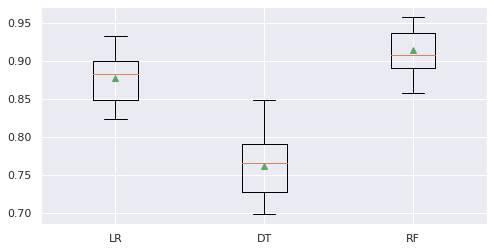

In [19]:
sns.set(rc={'figure.figsize':(8,4)})
 
recall_list = list()
 
for i in range(len(resultados)):
  valor = resultados[i]['test_recall']
  recall_list.append(valor)
 
plt.boxplot(recall_list, labels=nombres, showmeans=True)
 
plt.show()

e. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En cada gráfico debes incluir tus comentarios sobre el modelo generado: 

i. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
desempeño de dicha función “learning_curve()”. 

Curvas de aprendizaje del modelo lineal:


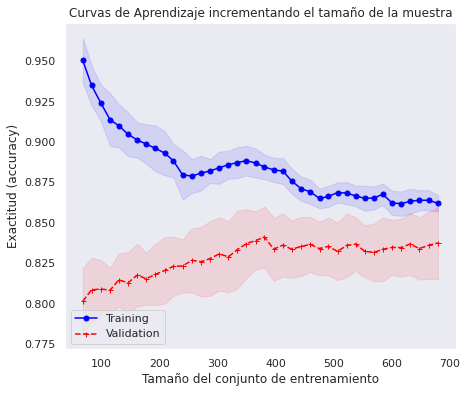

In [20]:
from sklearn import metrics
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

def mi_ModeloYCurvas(Xin, Yin):
       modelo = LogisticRegression(max_iter=2500, random_state=1)
       mi_pipe = Pipeline(steps=[("PreparaInfo", transformer),("LR", modelo)])       
       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
       delta_train_sz = np.linspace(0.1, 1.0, 40)
       tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = Yin,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_f1score))

       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

print('Curvas de aprendizaje del modelo lineal:')
mi_ModeloYCurvas(Xtv, ytv)       

Comentarios del grafico

En la grafica se muestra que al inicio el modelo se tiene una varianza muy grande pero el modelo va mejorando a medida que crece el conjunto de entrenamiento, lo que le permite incrementar la exactitud y que el modelo de entrenamiento y validacion puedan converger.

ii. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo. 


In [21]:
def fn_validation_curve (x_val,y_val,param_name,cv,scoring):
  modelo = DecisionTreeClassifier()
  pipe = Pipeline(steps=[("Preparainfo",transformer),("model",modelo)])
  rango_param = np.linspace(1, 20, 20,dtype="int")
  t_scores, v_scores = validation_curve(
      estimator=pipe,
      X=x_val,
      y=y_val,
      param_name=f"model__{param_name}",
      param_range=rango_param,
      cv=cv,
      scoring=scoring,
  )
  return rango_param, t_scores, v_scores

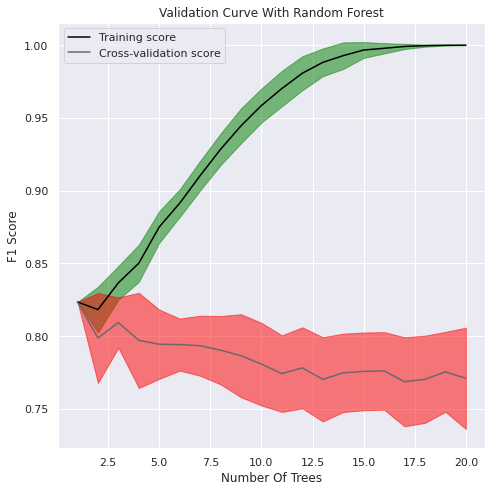

In [22]:
from scipy.stats import alpha
param_range,train_score, validation_score = fn_validation_curve(Xtv,ytv,"max_depth",kfold,make_scorer(mi_f1score))
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(validation_score, axis=1)
test_std = np.std(validation_score, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="green",alpha=0.5)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red",alpha=0.5)
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Comentarios del grafico

En esta grafica se utiliza F1 score para analizar datos binarios.
A medida que se van incrementando el numero de datos de arbol se mejora la precision del modelo, hasta cierto punto (17.5 arboles), ya que apartir de este valor mas arboles ya no aportan mayor decision al modelo.


iii. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo. 

In [23]:
def mi_ModeloYCurvas_RF(Xin, Yin, param_name, cv_entrada, scoring):
  modelo_RF = RandomForestClassifier()
  mi_pipe = Pipeline(steps=[("PreparaInfo", transformer),("model", modelo_RF)])       

  rango = np.linspace(1, 20, 20, dtype=int)
  t_scores, v_scores = validation_curve(estimator = mi_pipe, X=Xin, y=Yin, param_name=f"model__{param_name}", param_range=rango, cv=cv_entrada, scoring=scoring,)
  return rango, t_scores, v_scores

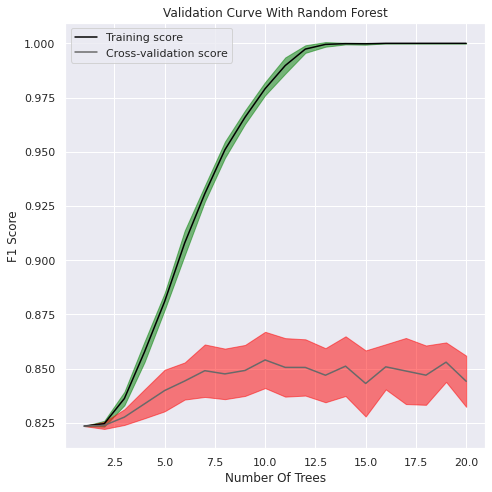

In [24]:
from scipy.stats import alpha
param_range,train_score, validation_score = mi_ModeloYCurvas_RF(Xtv,ytv,"max_depth",kfold,make_scorer(mi_f1score))
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(validation_score, axis=1)
test_std = np.std(validation_score, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="green",alpha=0.5)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red",alpha=0.5)
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Comentarios del grafico

En esta grafica se utiliza F1 score para analizar datos binarios. A medida que se van incrementando el numero de datos de arbol se mejora la precision del modelo, hasta cierto punto (12.5 arboles), ya que apartir de este valor mas arboles ya no aportan mayor decision al modelo.

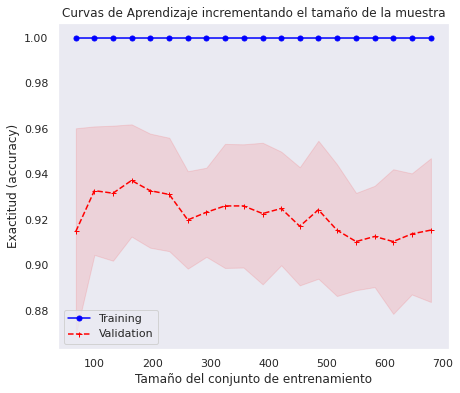

In [25]:
def mi_curvaRF(Xin, Yin): 
#Aqui usamos la funcion para el random forest
  modeloRF = RandomForestClassifier() 
  mi_pipe = Pipeline(steps=[("PreparaInfo", transformer),("ModeloUSadoRandomForest", modeloRF)])
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
  delta_train_sz = np.linspace(.1, 1, 20) #Aqui defininos 20 puntos enla partición, con 20 valores entre el .1 y el  1
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = Yin,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_recall)) #aqui reemplazamos el recall, con la funcion que tengamos de recall

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

mi_curvaRF(Xtv, ytv)

Comentarios del grafico

Esta grafica nos muestra que el modelo esta sobreentrenado. Ya que el conjunto de entrenamiento alcanza un valor de 1 a pesar de que cambia el tama;o del conjunto de entrenamiento. En contraste, la tendencia del conjunto de prueba va decreciendo a medida que crece el tama;o del conjunto de entrenamiento. Con lo cual se indica una varianza creciente entre ambos conjuntos.

Referencias: Jaramillo Marín,Verónica (2021). Machine Learning para la estimación del riesgo de crédito en una cartera de consumo. https://core.ac.uk/download/pdf/421936592.pdf


#**Ejercicio-5.**

Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas 
la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas. 

Puedes consultar su documentación de GridSearchCV en la siguiente liga: 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 

a. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones.

NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son 
posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación. 

Conclusiones de uso F1-Score

F1-score permite medir y comparar las metricas de Recall y Precision del modelo por analizar. Es interpretada como buena metrica con mayor exactitud entre mas cercana al 1.

In [26]:
#Definir parametros que se van a probar
#
#lbfgs - ['l2', 'none']
#liblinear - ['l1', 'l2']
#saga - ['elasticnet', 'l1', 'l2', 'none']

modelo_g = LogisticRegression(max_iter=10000, random_state=1)
mi_pipe_g = Pipeline(steps=[("PreparaInfo", transformer),("model", modelo_g)])       
mi_kfold_g = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
model_c = [0.01, 0.1, 1, 10, 100, 1000]

grid_param = [{'model__penalty': ['l1'], 'model__solver': [ 'saga'], 'model__class_weight':['balanced', None], 'model__C': model_c},
              {'model__penalty': ['l2'], 'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'model__class_weight':['balanced', None], 'model__C': model_c},
              {'model__penalty': ['elasticnet'], 'model__solver': ['saga'], 'model__class_weight':['balanced', None], 'model__C': model_c, 'model__l1_ratio': [0.5]},
              ]

gd = GridSearchCV(estimator=mi_pipe_g, param_grid=grid_param, scoring='f1', cv=mi_kfold_g)
gd.fit(Xtv, np.ravel(ytv))
best_score = gd.best_score_
best_param = gd.best_params_
print("Best Score:", best_score)
print("Best Parameter:", best_param)



Best Score: 0.8435928458702073
Best Parameter: {'model__C': 0.1, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'sag'}


b. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 


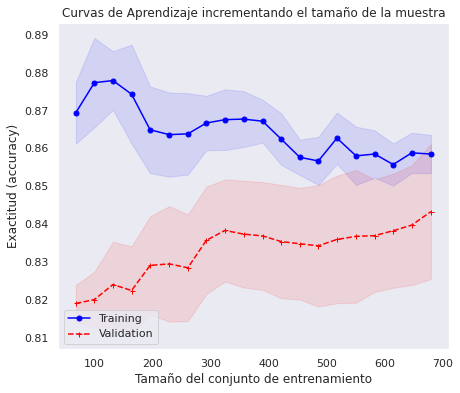

In [27]:

def fn_graf_lc (Xin, Yin, cs, penalizacion, resolutor):
  modelo_lc = LogisticRegression(C=cs, solver=resolutor, penalty=penalizacion, max_iter=10000, random_state=1)
  pipe_lc = Pipeline(steps=[("PreparaInfo", transformer),("RegresionLogistica", modelo_lc)])
  kfold_lc = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
  train_size_lc = np.linspace(0.1, 1.0, 20)
  tr_sizes, tr_scores, val_scores = learning_curve(estimator=pipe_lc, X = Xin, y = Yin, cv = kfold_lc, train_sizes = train_size_lc, random_state=10, scoring=make_scorer(mi_f1score))
  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

fn_graf_lc(Xtv, ytv, 0.1, 'l2', 'saga')

c. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de 
la métrica “precision”? Incluye tus conclusiones. 

Conclusion de metrica 'Precision'

La metrica de precision es util para conocer el porcentaje de acierto de las clases positivas del modelo. Mientras mayor sea su porcentaje de precision, esto significa mayor numero de datos predecidos correctamente.




In [28]:
modelo_dt = DecisionTreeClassifier()
pipe_dt = Pipeline(steps=[("PreparaInfo", transformer),("model", modelo_dt)])
kfold_dt = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  

param_dt = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001], 
            'model__criterion': ['gini', 'entropy'], 
            'model__max_depth':[2, 4, 6, 8, 10, 12], 
            'model__min_samples_split':[2, 4, 6,8,10],
            'model__class_weight': ['balanced', None]}

decision_tree = GridSearchCV (estimator =  pipe_dt, 
                            param_grid = param_dt,
                            scoring = make_scorer(mi_precision),
                            cv = kfold_dt)
decision_tree.fit(Xtv, np.ravel(ytv))

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('PreparaInfo',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scalar',
                                                                                          MinMaxScaler(feature_range=(1,
                                                                                                                      2))),
                                                                                         ('log',
                                                                                          FunctionTransformer(func=<ufunc 'log'>))]),
                                                                         ['duration',
                                      

In [29]:
best_score = decision_tree.best_score_
best_param = decision_tree.best_params_
print("Best Score:", best_score)
print("Best Parameter:", best_param)

Best Score: 0.8743712246419454
Best Parameter: {'model__ccp_alpha': 0.01, 'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}


d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

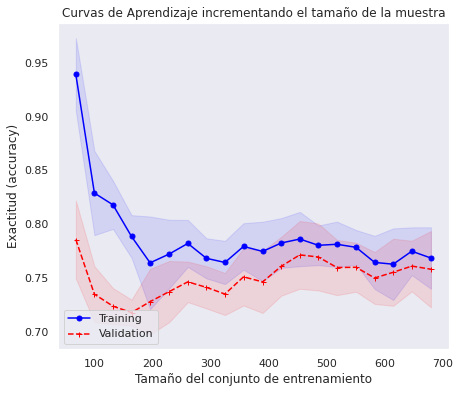

In [52]:
modelo_dt2 = DecisionTreeClassifier(ccp_alpha=decision_tree.best_params_.get('model__ccp_alpha'),
                                    criterion=decision_tree.best_params_.get('model__criterion'),
                                    max_depth=decision_tree.best_params_.get('model__max_depth'),
                                    min_samples_split=decision_tree.best_params_.get('model__min_samples_split')) 

#modelo_dt2 = modeloGSCV

# Definiendo Kfold
kfold_s = RepeatedStratifiedKFold( n_splits=5, n_repeats=3, random_state=10 )  

train_size_CV = np.linspace(0.1, 1.0, 20)

pipelineGS = Pipeline(steps=[("ct", transformer),("ConclusionDT", modelo_dt2)])


tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipelineGS ,    
                                                    X = Xtv,
                                                    y = ytv,
                                                    cv = kfold_s,
                                                    train_sizes = train_size_CV,
                                                    n_jobs=1,
                                                    scoring=make_scorer(mi_precision)) 
mi_LearningCurvePlot (tr_sizes, tr_scores, val_scores)

e. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones.

Conclusion de uso metrica recall

La metrica de recall es util para conocer el porcentaje de elementos de la clase positiva que son pronosticados correctamente. 


In [32]:
modelo_CV = RandomForestClassifier() #Aqui es donde ponemos el bosque aleatorio
mi_pipeCV = Pipeline(steps=[("model", modelo_CV)])
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)


ParametrosGRRF = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001],
              'model__criterion': ['gini', 'entropy'],
              'model__max_depth':[2, 4, 6, 8, 10, 12],
              'model__min_samples_split':[2, 4, 6,8,10],
              'model__class_weight': ['balanced', None]}

BosqueFinal=  GridSearchCV (estimator =  mi_pipeCV, #Aqui es donde usamos la funci[on grid que nos piden]
                            param_grid = ParametrosGRRF,
                            scoring = make_scorer(mi_recall),#Aqui es donde usamos el recall que nos piden
                            cv = mi_kfoldCV)

BosqueFinal.fit(Xtv, np.ravel(ytv))

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('model', RandomForestClassifier())]),
             param_grid={'model__ccp_alpha': [0.01, 0.001, 0.0001, 1e-05],
                         'model__class_weight': ['balanced', None],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [2, 4, 6, 8, 10, 12],
                         'model__min_samples_split': [2, 4, 6, 8, 10]},
             scoring=make_scorer(mi_recall))

f. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

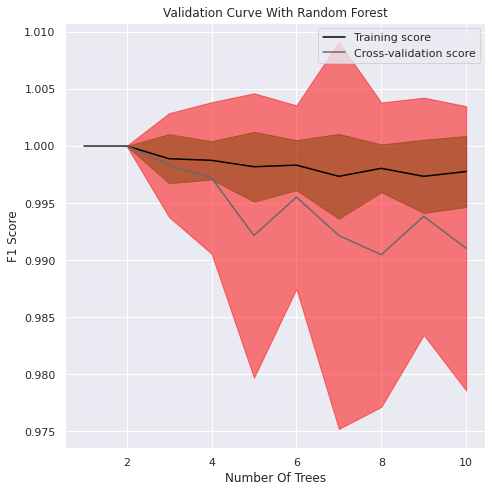

In [54]:
modeloRF = RandomForestClassifier(ccp_alpha=BosqueFinal.best_params_.get('model__ccp_alpha'),
                                 criterion=BosqueFinal.best_params_.get('model__criterion'),
                                 max_depth=10, 
                                 min_samples_split=BosqueFinal.best_params_.get('model__min_samples_split')) 

    
mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
param_range = np.linspace(1,10,10)

mi_pipe2= Pipeline (steps=[("PreparaInfo", transformer),("ModeloRandomForest", modeloRF)])
    
    
train_score, validation_score = validation_curve(n_jobs = 2, #Este parametro es para usar dos procesadores al mismo tiempo, para que sea mas rapido, varios estimadores lo tienene
                                  estimator = mi_pipe2, #Si en n jobs le ponen -1 te agarra todos los procesadores que tengas
                                  X = Xtv,
                                  y = np.ravel(ytv),
                                  param_name = f"ModeloRandomForest__max_depth", #Aqui va la etiqueta que tenemos en nuestro pipe
                                  param_range = param_range,
                                  cv = mi_kfold, 
                                  scoring = 'recall')

train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(validation_score, axis=1)
test_std = np.std(validation_score, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="green",alpha=0.5)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red",alpha=0.5)

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()
    

#**Ejercicio-6.**

Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación: 


a. Obtener el modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. 

Conclusiones

En el modelo de regresion logistica podemos observar el resultado de F1score concluye que el modelo predice las observaciones de manera correcta el 85%. Lo cual demuestra que es un buen modelo de prediccion.

In [38]:
estimador_optimo = gd.best_estimator_
predicciones = estimador_optimo.predict(Xtv)
print("Métrica f1-score: %.3f \n" %(mi_f1score(ytv, predicciones)))

Métrica f1-score: 0.859 



b. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. 


Conclusiones

El indice gini nos dice cuando el nodo esta mas puro, entre mas cercano a 0 sea es mas puro. En el arbol de decision que se muestra abajo podemos ver como el indice de Gini va decreciendo conforme la profundidad de nodos va incrementando solamente en dos situaciones con los nodos de color mas obscuro.


Métrica f1-score: 0.641 



[Text(0.5, 0.8333333333333334, 'X[6] <= 0.5\ngini = 0.5\nsamples = 850\nvalue = [425.0, 425.0]'),
 Text(0.25, 0.5, 'X[0] <= 0.24\ngini = 0.467\nsamples = 509\nvalue = [356.667, 210.714]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.499\nsamples = 289\nvalue = [155.0, 140.0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.384\nsamples = 220\nvalue = [201.667, 70.714]'),
 Text(0.75, 0.5, 'X[1] <= 0.209\ngini = 0.367\nsamples = 341\nvalue = [68.333, 214.286]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.274\nsamples = 258\nvalue = [33.333, 170.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.493\nsamples = 83\nvalue = [35.0, 44.286]')]

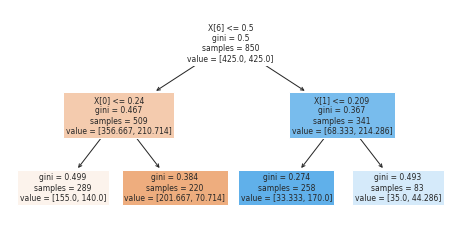

In [51]:
estimador_optimo = decision_tree.best_estimator_

predicciones = estimador_optimo.predict(Xtv)
print("Métrica f1-score: %.3f \n" %(mi_f1score(ytv, predicciones)))

tree.plot_tree(estimador_optimo.named_steps["model"], filled = True)

c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas 
encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.

Conclusiones

El resultado de la metrica de recall muestra 1, lo cual es el maximo por interpretar en la escala de 0 a 1. Esto significa que ha hecho la prediccion correcta de los elementros de la clase positiva en todas las ocaciones.



In [36]:
Mejor_bosque = BosqueFinal.best_estimator_
Bosque_predecido = Mejor_bosque.predict(Xtv)

print("Métrica recall: %.3f \n" %(mi_recall(ytv, Bosque_predecido))) 

Métrica recall: 1.000 



###**Fin de la Actividad de la semana 6.**